# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Jula Fangman
#### Github Link: https://github.com/julia-fangman/article-summarizer-final 

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

### Prereqs Installed:

In [1]:
import requests
from bs4 import BeautifulSoup
import pickle
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from textblob import TextBlob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip list
print('All prereqs installed.')

Package            Version
------------------ -----------
annotated-types    0.6.0
appnope            0.1.4
asttokens          2.4.1
beautifulsoup4     4.12.3
blis               0.7.11
catalogue          2.0.10
certifi            2024.2.2
charset-normalizer 3.3.2
click              8.1.7
cloudpathlib       0.16.0
comm               0.2.2
confection         0.1.4
contourpy          1.2.1
cycler             0.12.1
cymem              2.0.8
debugpy            1.8.1
decorator          5.1.1
executing          2.0.1
fonttools          4.51.0
idna               3.7
ipykernel          6.29.4
ipython            8.23.0
jedi               0.19.1
Jinja2             3.1.3
joblib             1.4.0
jupyter_client     8.6.1
jupyter_core       5.7.2
kiwisolver         1.4.5
langcodes          3.3.0
MarkupSafe         2.1.5
matplotlib         3.8.4
matplotlib-inline  0.1.7
murmurhash         1.0.10
nest-asyncio       1.6.0
nltk               3.8.1
numpy              1.26.4
packaging          24.0
pandas

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [2]:
import requests

# URL of the article
url = "https://www.forbes.com/health/fitness/what-is-pickleball/"

# Send a GET request to fetch the HTML content
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Get the HTML content
    html_content = response.text
    
    # Write the HTML content to a file
    with open("pickleball_article.html", "w", encoding="utf-8") as file:
        file.write(html_content)
    print("HTML content saved to pickleball_article.html")
else:
    print("Failed to fetch the article. Status code:", response.status_code)


HTML content saved to pickleball_article.html


2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [3]:
from bs4 import BeautifulSoup
from textblob import TextBlob
import re

# Read the HTML content from the file
with open("pickleball_article.html", "r", encoding="utf-8") as file:
    html_content = file.read()

# Parse the HTML using BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

# Extract text from the HTML
article_text = soup.get_text()

# Remove extra whitespaces and newlines
article_text = re.sub(r'\s+', ' ', article_text)

# Perform sentiment analysis
blob = TextBlob(article_text)
polarity_score = blob.sentiment.polarity

print("Sentiment Polarity Score:", polarity_score)

# Count the number of sentences
sentences = blob.sentences
num_sentences = len(sentences)
print("Number of Sentences in the Article:", num_sentences)


Sentiment Polarity Score: 0.37547029528736797
Number of Sentences in the Article: 181


3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [5]:
import spacy
from collections import Counter

# Load the English language model
nlp = spacy.load("en_core_web_sm")

# Process the article text using spaCy
doc = nlp(article_text)

# Tokenize the text and count the frequencies
token_counter = Counter([token.text.lower() for token in doc if not token.is_stop and not token.is_punct])

# Get the 5 most common tokens
common_tokens = token_counter.most_common(5)

print("Top 5 Most Frequent Tokens:")
for token, frequency in common_tokens:
    print(f"Token: {token}, Frequency: {frequency}")

# Print all tokens and their frequencies
print("\nAll Tokens and Their Frequencies:")
for token, frequency in token_counter.items():
    print(f"Token: {token}, Frequency: {frequency}")


Top 5 Most Frequent Tokens:
Token: best, Frequency: 120
Token: pickleball, Frequency: 70
Token: review, Frequency: 39
Token: health, Frequency: 36
Token: hearing, Frequency: 29

All Tokens and Their Frequencies:
Token:  , Frequency: 1
Token: pickleball, Frequency: 70
Token: complete, Frequency: 3
Token: guide, Frequency: 4
Token: forbes, Frequency: 16
Token: health, Frequency: 36
Token: select, Frequency: 1
Token: region, Frequency: 1
Token: united, Frequency: 2
Token: states, Frequency: 1
Token: kingdom, Frequency: 1
Token: germany, Frequency: 1
Token: india, Frequency: 1
Token: australia, Frequency: 1
Token: italy, Frequency: 1
Token: canada, Frequency: 1
Token: mind, Frequency: 3
Token: online, Frequency: 18
Token: therapy, Frequency: 12
Token: best, Frequency: 120
Token: affordable, Frequency: 2
Token: takes, Frequency: 1
Token: insurance, Frequency: 2
Token: anxiety, Frequency: 4
Token: depression, Frequency: 3
Token: adhd, Frequency: 1
Token: couples, Frequency: 1
Token: marriage

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [6]:
import spacy
from collections import Counter

# Load the English language model
nlp = spacy.load("en_core_web_sm")

# Process the article text using spaCy
doc = nlp(article_text)

# Extract lemmas and count their frequencies
lemma_counter = Counter([token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct])

# Get the 5 most common lemmas
common_lemmas = lemma_counter.most_common(5)

print("Top 5 Most Frequent Lemmas:")
for lemma, frequency in common_lemmas:
    print(f"Lemma: {lemma}, Frequency: {frequency}")

# Print all lemmas and their frequencies
print("\nAll Lemmas and Their Frequencies:")
for lemma, frequency in lemma_counter.items():
    print(f"Lemma: {lemma}, Frequency: {frequency}")


Top 5 Most Frequent Lemmas:
Lemma: best, Frequency: 110
Lemma: pickleball, Frequency: 70
Lemma: review, Frequency: 42
Lemma: health, Frequency: 36
Lemma: aids, Frequency: 25

All Lemmas and Their Frequencies:
Lemma:  , Frequency: 1
Lemma: pickleball, Frequency: 70
Lemma: complete, Frequency: 3
Lemma: guide, Frequency: 5
Lemma: forbes, Frequency: 16
Lemma: health, Frequency: 36
Lemma: select, Frequency: 1
Lemma: region, Frequency: 1
Lemma: united, Frequency: 2
Lemma: states, Frequency: 1
Lemma: kingdom, Frequency: 1
Lemma: germany, Frequency: 1
Lemma: india, Frequency: 1
Lemma: australia, Frequency: 1
Lemma: italy, Frequency: 1
Lemma: canada, Frequency: 1
Lemma: mind, Frequency: 3
Lemma: online, Frequency: 18
Lemma: therapy, Frequency: 12
Lemma: best, Frequency: 110
Lemma: affordable, Frequency: 2
Lemma: take, Frequency: 2
Lemma: insurance, Frequency: 2
Lemma: anxiety, Frequency: 4
Lemma: depression, Frequency: 3
Lemma: adhd, Frequency: 1
Lemma: couples, Frequency: 1
Lemma: marriage, Fr

5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

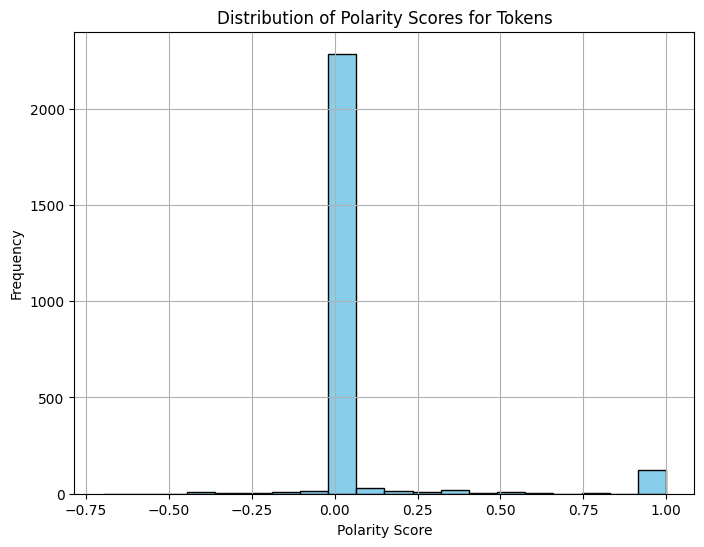

In [7]:
import matplotlib.pyplot as plt
from textblob import TextBlob

# Calculate polarity score for each token in the article
token_scores = [TextBlob(token.text).sentiment.polarity for token in doc if not token.is_stop and not token.is_punct]

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(token_scores, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Polarity Scores for Tokens')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [11]:
# The highest score is definitely around 0.00, with the next highest score being near 1.00. 

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

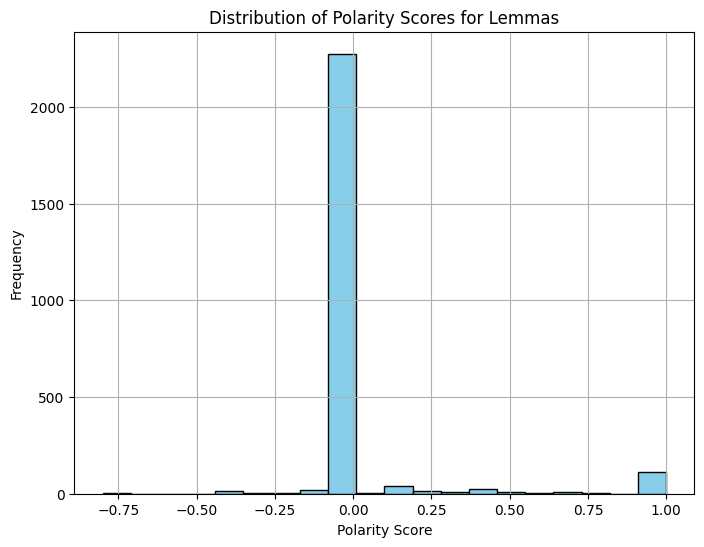

In [12]:
import matplotlib.pyplot as plt
from textblob import TextBlob

# Calculate polarity score for each lemma in the article
lemma_scores = [TextBlob(token.lemma_).sentiment.polarity for token in doc if not token.is_stop and not token.is_punct]

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(lemma_scores, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Polarity Scores for Lemmas')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [13]:
# The scores also seems to be the highest near 0.00. However, this seems to be higher between -0.25 to 0.00 (rather than on the postive side). 

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 
* Cutoff Score (lemmas):

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?